In [1]:
import nbsetup as nb
import copy
import seaborn as sns
import pandas as pd
import itertools
import scipy as sp
import numpy as np
import ensemblepy as ep
import matplotlib.pyplot as plt
from simulations.daisy_world.series import scan

In [2]:
x = np.linspace(0.48, 1.35, 99)

In [3]:
pop3 = {'white': {'albedo': 0.75, 'initial': 0.3}, 'black': {'albedo': 0.25, 'initial': 0.3}}
wv = scan(luminosities=x, population=pop3, cp=nb.cp)

In [4]:
lasts = copy.deepcopy([series.y[-1] for series in wv.y])

In [24]:
def divergences(pmfs):
    dd = []
    for a,b in itertools.combinations(pmfs, 2):
        p_entropy = ep.pooled_entropy([a,b])
        entropies = ep.ensemble_entropies([a,b])
        div = ep.js_divergence(p_entropy, entropies, None)
        dd.append(div)
    return dd

divs = np.array([divergences(l.histograms) for l in lasts])

In [ ]:
# divs = np.array([ep.radial_divergences(l.histograms) for l in lasts])

In [25]:
norm_div = divs/np.log(3) # normalise divs by maximum entropy for 3 bins
incohesion = np.array([ep.density_variance(row) for row in norm_div])
incoherence = np.array([l.incoherence for l in lasts])

In [27]:
data = []
for i, row in enumerate(divs):
    for p in row:
        data.append({
            'x': x[i],
            'divergence': p,
            'incoherence': incoherence[i],
            'incohesion': incohesion[i],
        })

data = pd.DataFrame(data)

In [13]:
norm_div = divs/np.log(3) # normalise divs by maximum entropy for 3 bins
incohesion = np.array([ep.density_variance(row) for row in norm_div])
incoherence = np.array([l.incoherence for l in lasts])

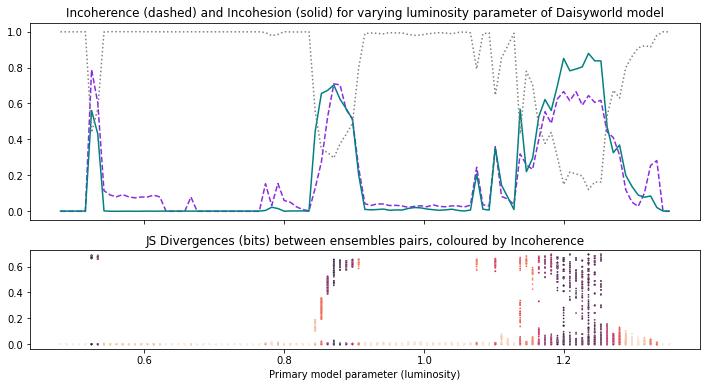

In [102]:
fig, (a0, a1) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [2, 1]})
sns.lineplot(x=x, y=incoherence, label='incoherence', linestyle='dashed', color='blueviolet', legend=False, ax=a0)
sns.lineplot(x=x, y=incohesion, label='incohesion', color='teal', legend=False, ax=a0)
sns.lineplot(x=x, y=1-incohesion, label='self-organisation', linestyle='dotted', color='grey', legend=False, ax=a0)
a0.set(xlabel='Primary model parameter (luminosity)', title='Incoherence (dashed) and Incohesion (solid) for varying luminosity parameter of Daisyworld model')

sns.scatterplot(data=data, x='x', y='divergence', hue='incoherence', s=3, palette='rocket_r', legend=False, ax=a1)
a1.set(xlabel='Primary model parameter (luminosity)', ylabel=None, title='JS Divergences (bits) between ensembles pairs, coloured by Incoherence')

fig.savefig('daisy-example.eps')